# **Predicting Potential Strokes with Machine Learning Algorithms**

### Project Topic & Description 
--- 
Strokes affect 795,000 individuals in the United States every year[2]. The World Health Organization (WHO) outlines that strokes are the third leading cause of disability and second leading cause of death[3]. If certain qualities lead to higher chances of strokes, predictive medicine using machine learning models could help those individuals and their doctors take steps to avoid them. The question is, "can machine learning models and techniques be used by doctors to predict strokes?"

This goal of this project is to predict whether or not an individual will have a stroke. This type of problem is considered a **classification** problem. Using qualities like an individual's hypertension, heart disease, or smoking status along with other fields such as their BMI, average glucode level, and gender I seek to identify if an individual will have a stroke using machine learning algorithms. During this project, the algorithms K-Nearest Neighbors, Random Forest, and Neural Network will be implemented to maximize performanace. 

### Data Source 
---
The data set used in this project was obtained from Kaggle by the author Fedesoriano[1]. A link to the dataset is included with its reference. As outlined above this dataset consists of attributes such as an individual's gender, BMI, marriage staus, ecetera. The outcome is a boolean value of if the individual had a stroke or not. The author does not describe how the data was collected or where it is from as the source is labeled as *Confidential*. However, the Kaggle score of this data sits very high.

### References

[1] Fedesoriano. (2021, January 26). Stroke prediction dataset. Kaggle. Retrieved May 6, 2025, from https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset<br>
[2] Centers for Disease Control and Prevention. (2022, October 14). Stroke facts. Centers for Disease Control and Prevention. Retrieved May 6, 2025, from https://www.cdc.gov/stroke/facts.htm<br>
[3] Singh, P. K. (2021, October 28). World stroke day. World Health Organization. Retrieved May 6, 2025, from https://www.who.int/southeastasia/news/detail/28-10-2021-world-stroke-day<br>

---

### GitHub Repository & Video Link

GitHub Repo: [SupervisedLearningFinal](https://github.com/Jacob-Kuhn/SupervisedLearningFinal/tree/main)<br>
Presentation Video Link: [Predicting Potential Strokes with Machine Learning Algorithms](https://www.youtube.com/watch?v=e39y9E8HejI)

## **Initial Library Loading & Reading Dataset**

In [1]:
import scipy as sp
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, recall_score, roc_curve, auc, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
# Set color map to have light blue background
sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
print(df.shape)
df.head()
df.info()

(5110, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


---

## **Data** 

The stroke prediction dataset consists of 5110 samples and 12 features. All of the data is located in the "healthcare-dataset-stroke-data.csv" file and can all be accessed from the same dataset. The outcome variable for the dataset is called *stroke*. It is a boolean type where 1 means the individual had a stroke and 0 means they did not. 

**Features and Descriptions**:<br>
ID - row number of record - will be removed during cleaning<br>
Gender - string value Male/Female<br>
Age - Numeric value of age<br>
Hypertension - Binary feature 0/1 for whether the individual has hypertension or not<br>
Heart_Disease - Binary feature 0/1 for whether the individual has hypertension or not<br>
Ever_Married - string value True/False<br>
Work_Type - string value - examples: {Private, Self-employed, Govt, etc}<br>
Residence_Type - string value Urban/Rural<br>
Avg_Glucose_Level - numeric value of average glucose in blood<br>
BMI - numeric value of body mass index<br>
Smoking_Status - string value of smoking status {never smoked, Unknown, etc}<br>
Stroke - outcome feature - binary value 0/1 if individual had stroke or not

This dataset is incredibily imbalanced. Below, it is listed that 95.11% of the data in this dataset did not have a stroke, and 4.89% of them did. Therefore, the sensitivity value of this project will be more important than the accuracy. This is because if everything was labeled as not having a stroke, the score would have a 95.11% accuracy. This is great, but unimportant since every stroke occurences was missed. Sensitivity will make sure that of all records that truly had a stroke, how many did the model correctly label?

---

In [3]:
df['stroke'].value_counts(normalize=True) * 100

stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64

---

## **Data Cleaning** 

In this section, the data in this set will be cleaned up to allow for more accurate predictions.
The first step is to remove the features that will provide no value to the outcome predictor. In this dataset, there is the column ***ID*** that simply records which row the instance is on.
### ID

In [4]:
df.drop('id', axis=1, inplace=True)

### Hypertension, Heart_Disease, and Stroke
Additionally, looking at the df.info() output boolean types in int64 datatypes are stored for hypertension, heart_disease, and stroke. This could cause issues with the models speed later. Converting the types also ensure the integrity of the data by not allowing other string values in the columns. Therefore, this data is munged by converting the datatypes to booleans. There are not any null values for these fields, so they can be easily converted.

In [5]:
print(f"Distinct Hypertension Values: {df['hypertension'].unique()}")
print(f"Distinct Heart_Disease Values: {df['heart_disease'].unique()}")
print(f"Distinct Stroke Values: {df['stroke'].unique()}")

Distinct Hypertension Values: [0 1]
Distinct Heart_Disease Values: [1 0]
Distinct Stroke Values: [1 0]


In [6]:
df['hypertension'] = df['hypertension'].astype('boolean')
df['heart_disease'] = df['heart_disease'].astype('boolean')
df['stroke'] = df['stroke'].astype('boolean')

### Gender, Ever_Married, and Residence_Type
To stay consistent, other values should be used that use Yes/No, True/False, etc as booleans. If this does not happen, models may have issues later if they only take in numeric data. Additionally, pandas may be unpredictable if given string values of True or False instead of 1 or 0. By converting features values, the integrity of the data can be better ensured.

Gender is analyzed first.

In [7]:
print(f"Distinct Gender Values: {df['gender'].value_counts()}")

Distinct Gender Values: gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


There are multiple ways to go about cleaning this feature. One option would be to create a 3-tier classification column. However, because there is only 1 record for Other, I am going to convert this feature to a binary feature ***is_female*** where a value 1 means the individual is female and a 0 means they are male or other. This strategy allows us to keep the 'Other' record while allowing us to create a binary feature. The original ***Gender*** column is dropped from the dataframe, too. 

In [8]:
df['is_female'] = (df['gender'].str.strip().str.lower() == 'female').astype('boolean')
df.drop('gender', axis=1, inplace=True)
print(f"Distinct Is_Female Values: {df['is_female'].value_counts()}")

Distinct Is_Female Values: is_female
True     2994
False    2116
Name: count, dtype: Int64


Next, the feature ***ever_married*** is analyzed. The only two values here are Yes/No. Therefore, this feature is converted into boolean 1/0 values based on Yes/No. This will let us avoid the issues outlined at the start of this section/

In [9]:
print(f"Distinct Ever_Married Values: {df['ever_married'].value_counts()}")

Distinct Ever_Married Values: ever_married
Yes    3353
No     1757
Name: count, dtype: int64


In [10]:
df['ever_married'] = (df['ever_married'].str.strip().str.lower() == 'yes').astype('boolean')

In [11]:
print(f"Distinct Ever_Married Values: {df['ever_married'].value_counts()}")

Distinct Ever_Married Values: ever_married
True     3353
False    1757
Name: count, dtype: Int64


Finally, the field ***Residence_Type*** is analyzed. Here, the 2 values are either Urban or Rural. Therefore, to create a binary boolean feature, a new feature is created called ***urban_residence*** that stores a 1 if the individual lives in an urban space and a 0 if the individual lives rurally. The old ***Residence_Type*** feature will be dropped from the data frame, too. 

In [12]:
print(f"Distinct Residence_Type Values: {df['Residence_type'].value_counts()}")

Distinct Residence_Type Values: Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64


In [13]:
df['urban_residence'] = (df['Residence_type'].str.strip().str.lower() == 'urban').astype('boolean')
df.drop('Residence_type', axis=1, inplace=True)

In [14]:
print(f"Distinct Urban_Residence Values: {df['urban_residence'].value_counts()}")

Distinct Urban_Residence Values: urban_residence
True     2596
False    2514
Name: count, dtype: Int64


### Work_Type

Below, the work types and counts along with the outcome variable spread for the 'Never_worked' case.

In [15]:
print(df['work_type'].value_counts())

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64


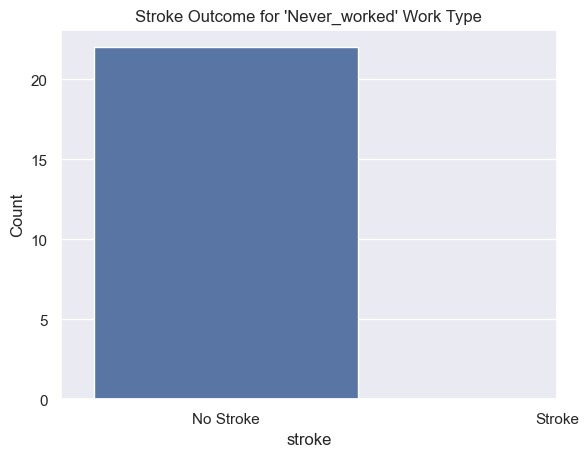

In [16]:
never_worked = df[df['work_type'].str.lower() == 'never_worked']
sns.countplot(x='stroke', data=never_worked)
plt.title("Stroke Outcome for 'Never_worked' Work Type")
plt.xticks([0, 1], ['No Stroke', 'Stroke'])
plt.ylabel("Count")
plt.show()

Seen above, the spread of work types is fairly even except for the 'Never_worked' type. Because there is very low frequency for this type, it is mearly causing noise. Every instance of 'Never_worked' does not have a stroke. Therefore, to make the data better, the cases of 'Never_worked' will be dropped reducing the record count to 5088. Additionally, the other types should be formatted to be more consistent for the sake of readability. 

In [17]:
# Drop Never_Worked Columns
df = df[df['work_type'].str.strip().str.lower() != 'never_worked']
# Rename other cases for readbility
df['work_type'] = df['work_type'].replace({
    'Govt_job':'Government',
    'children':'Children',
    'Self-employed':'Self-Employed'})

In [18]:
print(df['work_type'].value_counts())

work_type
Private          2925
Self-Employed     819
Children          687
Government        657
Name: count, dtype: int64


### Smoking_Status

In [19]:
print(df['smoking_status'].value_counts())

smoking_status
never smoked       1878
Unknown            1536
formerly smoked     885
smokes              789
Name: count, dtype: int64


Above, the ***Smoking_Status*** values and their counts are listed. Unfortuanely, there are a large amount of individuals that the smoking status is unknown for. Therefore, it is impossible for us to simply drop those rows given they make up half of the dataset. This might cause problems with the models later on who use ***Smoking_Status***, but this shortcoming will be one that is accepted. The only cleaning that will be done is to rename the types to be more readible and consistent.

In [20]:
# Rename other cases for readbility
df['smoking_status'] = df['smoking_status'].replace({
    'never smoked':'Never Smoked',
    'formerly smoked':'Formerly Smoked',
    'smokes':'Actively Smokes'})
print(df['smoking_status'].value_counts())

smoking_status
Never Smoked       1878
Unknown            1536
Formerly Smoked     885
Actively Smokes     789
Name: count, dtype: int64


### BMI - Body Mass Index

In [21]:
print(f"Null BMI records: {df['bmi'].isna().sum()}")
print(f"Total records: {len(df)}")

Null BMI records: 201
Total records: 5088


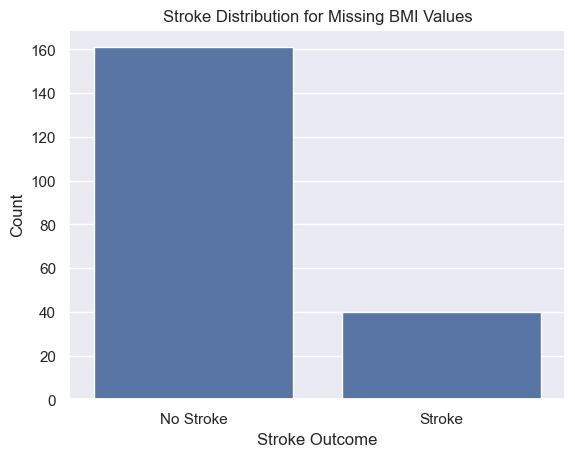

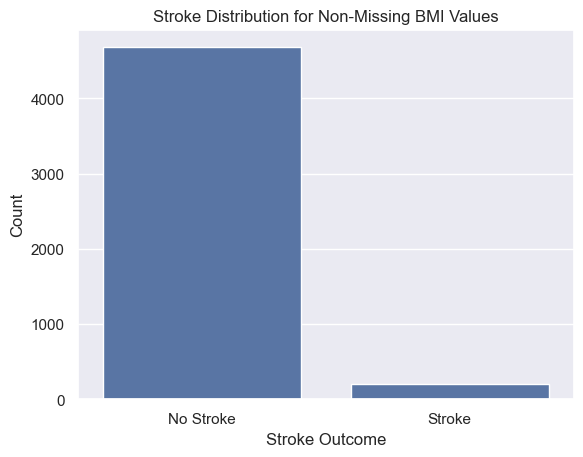

In [22]:
#missing BMI
missing_bmi = df[df['bmi'].isna()]
sns.countplot(x='stroke', data=missing_bmi)
plt.title("Stroke Distribution for Missing BMI Values")
plt.xticks([0, 1], ['No Stroke', 'Stroke'])
plt.ylabel("Count")
plt.xlabel("Stroke Outcome")
plt.show()

#non missing BMI
missing_bmi = df[df['bmi'].notna()]
sns.countplot(x='stroke', data=missing_bmi)
plt.title("Stroke Distribution for Non-Missing BMI Values")
plt.xticks([0, 1], ['No Stroke', 'Stroke'])
plt.ylabel("Count")
plt.xlabel("Stroke Outcome")
plt.show()

BMI is the column that is missing the most data. As shown above, this count is 201 records. A few solutions could be implemented here: the average BMI of all the records couyld be filled them in, the median BMI of all of the records could fill in the N/A records, or the records that are N/A could be droppped. Based on the bar-plots, it looks like 20% of those missing BMI data have strokes. This is a lot larger than the dataset as a whole. Therefore, to clean this data, rows that are missing BMI and have strokes will take on the median BMI of those records who have strokes. The rows that are missing BMI but do not have strokes will take on the median BMI of those records who did not have strokes. This strategy is sometimes referred to as conditional median imputation. This may cause issues later with the data used on the models, but this strategy may be more accurate than if the median BMI of all of the values was inserted or if all of them were simply dropped. 

In [23]:
median_stroke_bmi = df[df['stroke'] == 1]['bmi'].median()
median_no_stroke_bmi = df[df['stroke'] == 0]['bmi'].median()

#apply medians
df['bmi'] = df.apply(
    lambda row: median_stroke_bmi if pd.isna(row['bmi']) and row['stroke'] == 1
    else (median_no_stroke_bmi if pd.isna(row['bmi']) and row['stroke'] == 0
          else row['bmi']),
    axis=1
)

In [24]:
print(f"Null BMI records: {df['bmi'].isna().sum()}")

Null BMI records: 0


## Normalizing Numeric Features

One challenge that will occur with having numeric features such as BMI, Age, and Avg_Glucose_Level is the scale of each features values. For models such as K-Nearest-Neighbors, Support Vector Machines, Nueral Networks, or Principal Component Analysis, having numeric values at many different scales will contribution more or less depending on the values. Therefore, to avoid this situation, the use of Z-Score normalization via *SkLearn StandardScaler* will be implemted on the columns. To avoid losing data, these features will transalated into new columns ***age_z***, ***avg_glucose_level_z***, and ***bmi_z**. By doing this, the Z-Score normalized features can be used in the models that need them and use the non-normalized columns for increased readability in other models such as Random Forest or Gradient Boosting.

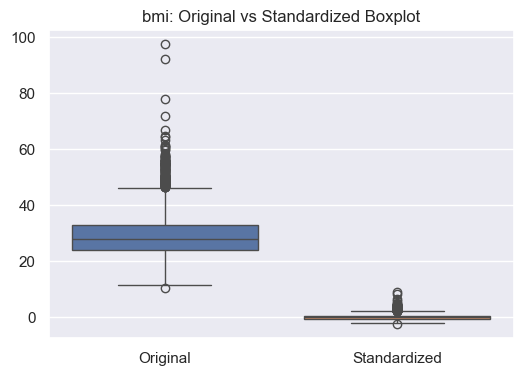

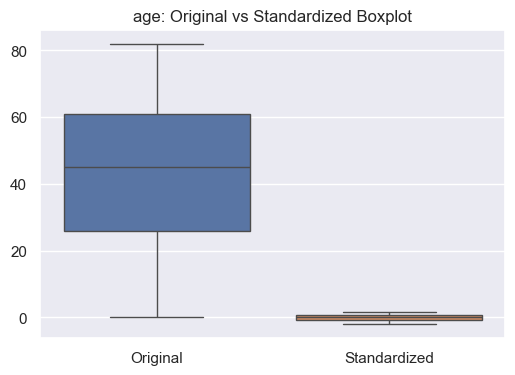

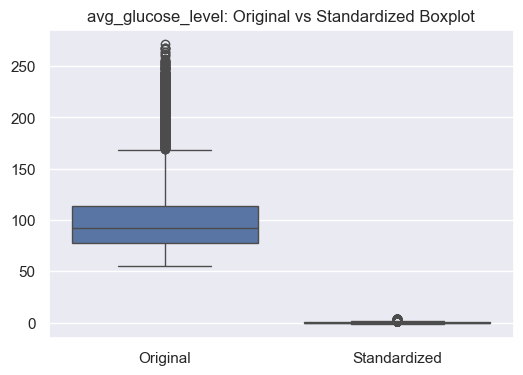

In [34]:
scalable_features = ['bmi','age','avg_glucose_level']
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df[scalable_features])
df['bmi_z'] = scaled_values[:,0]
df['age_z'] = scaled_values[:,1]
df['avg_glucose_level_z'] = scaled_values[:,2]

#show the change
columns = ['bmi', 'age', 'avg_glucose_level']
for col in columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df[[col, f'{col}_z']])
    plt.title(f'{col}: Original vs Standardized Boxplot')
    plt.xticks([0, 1], ['Original', 'Standardized'])
    plt.show()

### Data Cleaning Wrapup

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5088 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  5088 non-null   float64
 1   hypertension         5088 non-null   boolean
 2   heart_disease        5088 non-null   boolean
 3   ever_married         5088 non-null   boolean
 4   work_type            5088 non-null   object 
 5   avg_glucose_level    5088 non-null   float64
 6   bmi                  5088 non-null   float64
 7   smoking_status       5088 non-null   object 
 8   stroke               5088 non-null   boolean
 9   is_female            5088 non-null   boolean
 10  urban_residence      5088 non-null   boolean
 11  bmi_z                5088 non-null   float64
 12  age_z                5088 non-null   float64
 13  avg_glucose_level_z  5088 non-null   float64
dtypes: boolean(6), float64(6), object(2)
memory usage: 417.4+ KB


After cleaning the dataset, there are 6 boolean features along with an imputed numeric feature: ***bmi***. The categorical feautures ***work_type*** and ***smoking_status*** have standardized types. The number of records was reduced to 5088 by removing a few rows with missing data. Additionally, new columns were created for the numerical features ***age_z***, ***avg_glucose_level_z***, and ***bmi_z** to reduce the impact of the value scales in each feature when running future models. With cleaned data, the dataset can begin to be explored.

In [35]:
#Save the cleaned dataset
#df.to_csv("cleaned_healthcare_stroke_dataset.csv", index=False)

---

## **Exploratory Data Analysis** 

Now that the data is clean, exploratory analysis can be done on the interactions of each features and their interaction with the outcome variable ***stroke***.

Below, the cleaned dataset is read in.

In [2]:
df = pd.read_csv('cleaned_healthcare_stroke_dataset.csv')

### Continuous Predictors: Age, BMI, Average_Glucose_Level

First, the continuous variables are explored. Though Z-Score columns were made for normalization, here, the original columns are analysize for increased readibility.

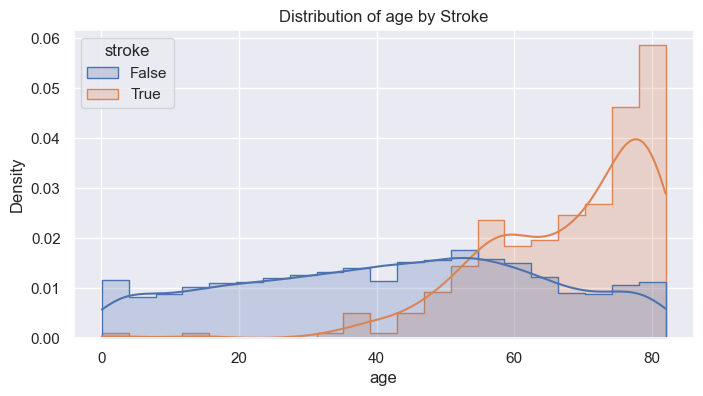

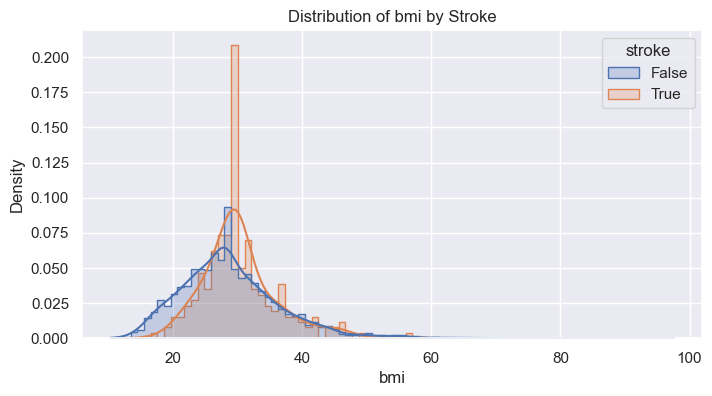

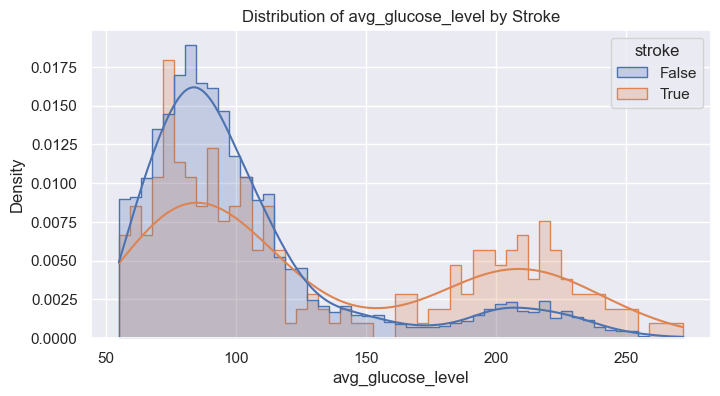

In [100]:
for col in ['age', 'bmi', 'avg_glucose_level']:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, hue='stroke', kde=True, element='step', stat='density', common_norm=False)
    plt.title(f'Distribution of {col} by Stroke')
    plt.show()

The above histograms layered with stroke outcome distribution show a pattern between values and stroke outcomes.

First, ***Age*** distribution shows the dataset is heavily skewed towards elderly individuals. The graph also shows as an individual gets older, they are more likely to have a stroke. This knowledge shows a positive correlation between age and stroke likelyhood.

Secondly, ***BMI*** distribution shows the dataset has quite a few records at the 31 BMI recording. When BMI is less than around 26, more values do not have a strok than do have a stroke. Between a BMI of 26 and 35, an individual is more likely to have a stroke than not. Anything greater than a BMI tends to have an equal chance of having or not having a stroke. With this information, the conclusion can be drawn that a lower BMI tends to have a lower chance of having a stroke. 

Thirdly, ***Average_Glucose_Level*** distribution shows a positive correlation between the glucose level and having a stroke. Those with lower average glucose levels, around 225 mg/DL, are less likely to have a stroke. Those over 225 mg/DL are more likely to have a stroke. 

These three continuous predictors seem to show correlation between their values and whether an individual will have a stroke or not. An issue that could still arise relates to the base accuracy of this dataset: 95.13%. How much can this predictors affect the outcome and help with sensitivity measurements after running this data through different models?


### Classification Predictors: Hypertension, Heart_Disease, Ever_Married, Work_Type, Smoking_Status, Is_Female, Urban_Residence

Below, the analysis of the classification features are done through a bar plot that measures the distribution of stoke outcomes per classication case. The helper method written below helps with drawing these plots.

In [101]:
def barplot_with_percentages(data, x, y='stroke'):
    plt.figure(figsize=(8, 4))
    ax = sns.barplot(data=data, x=x, y=y)
    plt.title(f'Proportion of Stroke by {x}')
    
    # Add percentage labels
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2%}', (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom')
    
    plt.ylim(0, 1)
    plt.show()

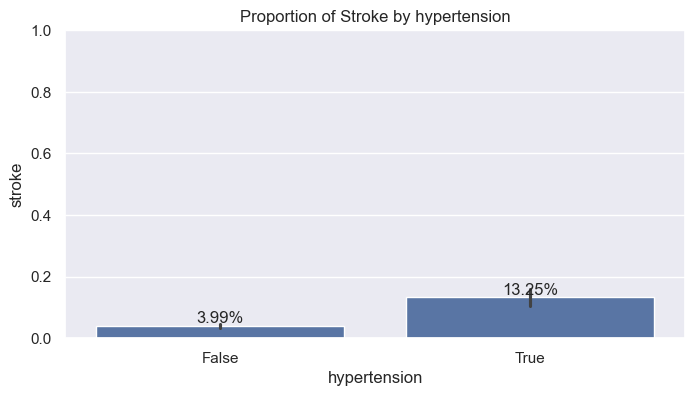

In [102]:
barplot_with_percentages(df, 'hypertension')

The barplot above shows a parallel between ***hypertension*** and strokes. The plot is read as 3.99% of individuals without hypertension had strokes, and 13.25% of individuals with hypertension had strokes. Based on this plots, it could be said that those with hypertension are 3.32x more likely to have a stroke. However, with this plot and those below it, association does not equal causation. The dataset could also be biased towards one outcome. These caveats are laid out to keep from drawing hasty conclusions about the dataset.

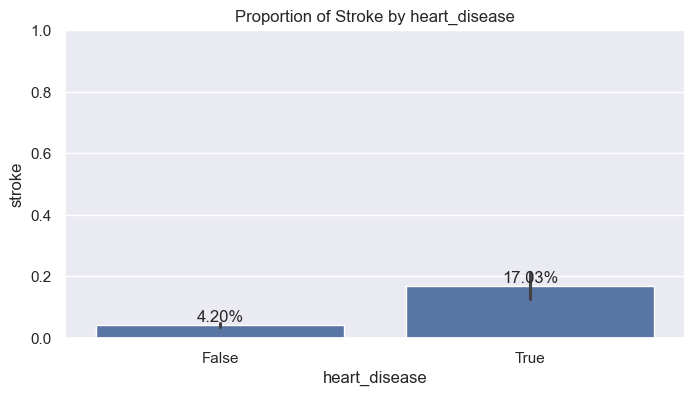

In [103]:
barplot_with_percentages(df, 'heart_disease')

The ***Heart_Disease*** plot seems to show a correlation with those who have strokes. There is a 12% gap between those who did not have heart disease having a stroke with those who did. 

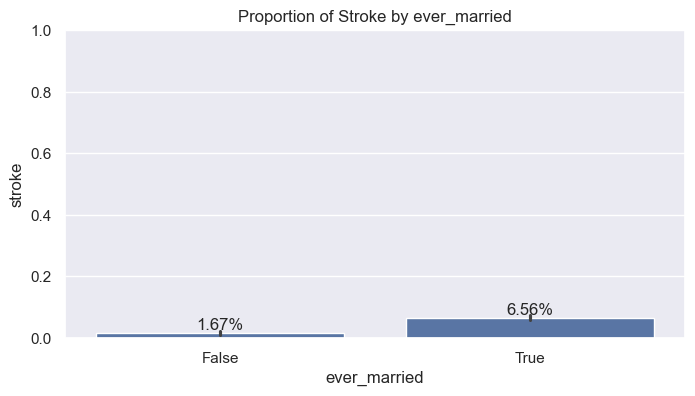

In [104]:
barplot_with_percentages(df, 'ever_married')

Based on the above barplot, it would seem marriage has association with whether an individual has a stroke or not. However, this could be caused by ***ever_married*** interacting with ***age***. In the previous section, it was shown that older individuals were more likely to have strokes. This feature could be interacting with that since it would follow that an older individual is more likely to have been married. 

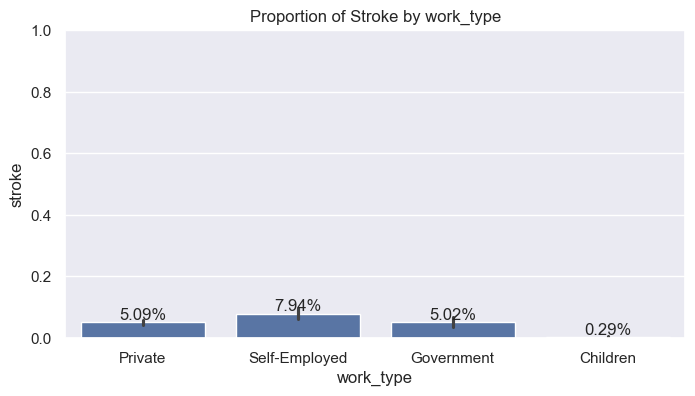

In [105]:
barplot_with_percentages(df, 'work_type')

In [106]:
print(f"Distinct Work Type Values: {df['work_type'].value_counts()}")

Distinct Work Type Values: work_type
Private          2925
Self-Employed     819
Children          687
Government        657
Name: count, dtype: int64


The ***Work_Type*** bar plot seems to show that Children are less likely to have a stroke. The plot also associates *self-employed* individuals with higher rates of strokes. It will be interesting to see if this outcome shows in the models and PCA. The possibility that the data is biased towards some individuals is another entirely possible case. 

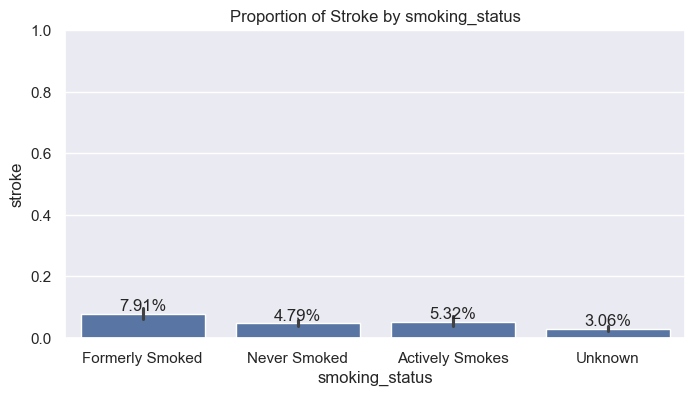

In [107]:
barplot_with_percentages(df, 'smoking_status')

The ***Smoking_Status*** bar plot for this dataset displays those who smoke or formely smoked have higher rates of stroke compared to those who never smoked. Although Unknown is at 3%, it can be reasoned that the category contains instances of the three other classication types. 

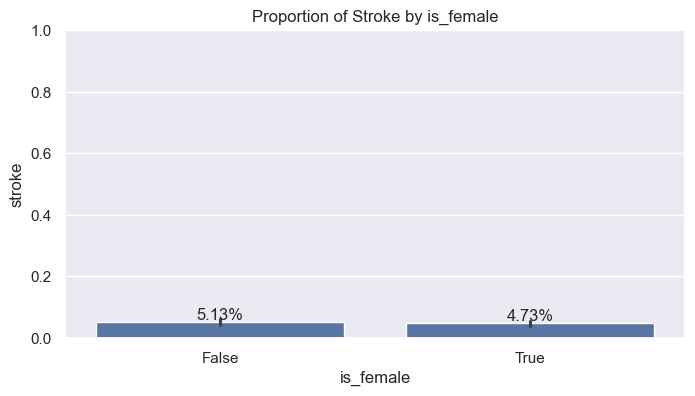

In [108]:
barplot_with_percentages(df, 'is_female')

Based on the barplot above, whether an indvidual is female or not have little to not association with whether the individual will have a stoke or not. 

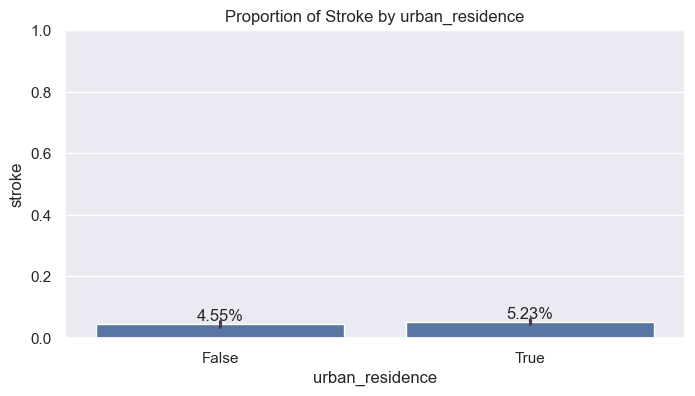

In [109]:
barplot_with_percentages(df, 'urban_residence')

Additionally, whether an indvidual lives rurally or in an urban setting has little correlation with stroke outcomes. 

### Correlation Matrix

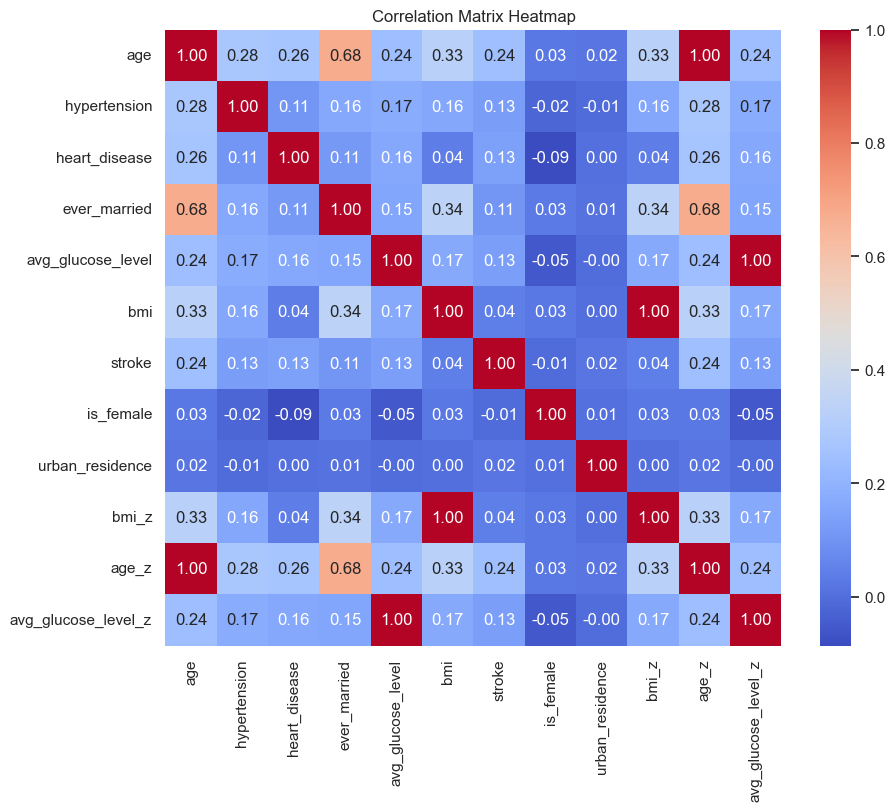

In [114]:
plt.figure(figsize=(10, 8))
numeric_cols = df.select_dtypes(include=['int64', 'float64', 'bool']).copy()
for col in numeric_cols.select_dtypes(include='bool'):
    numeric_cols[col] = numeric_cols[col].astype(int)
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

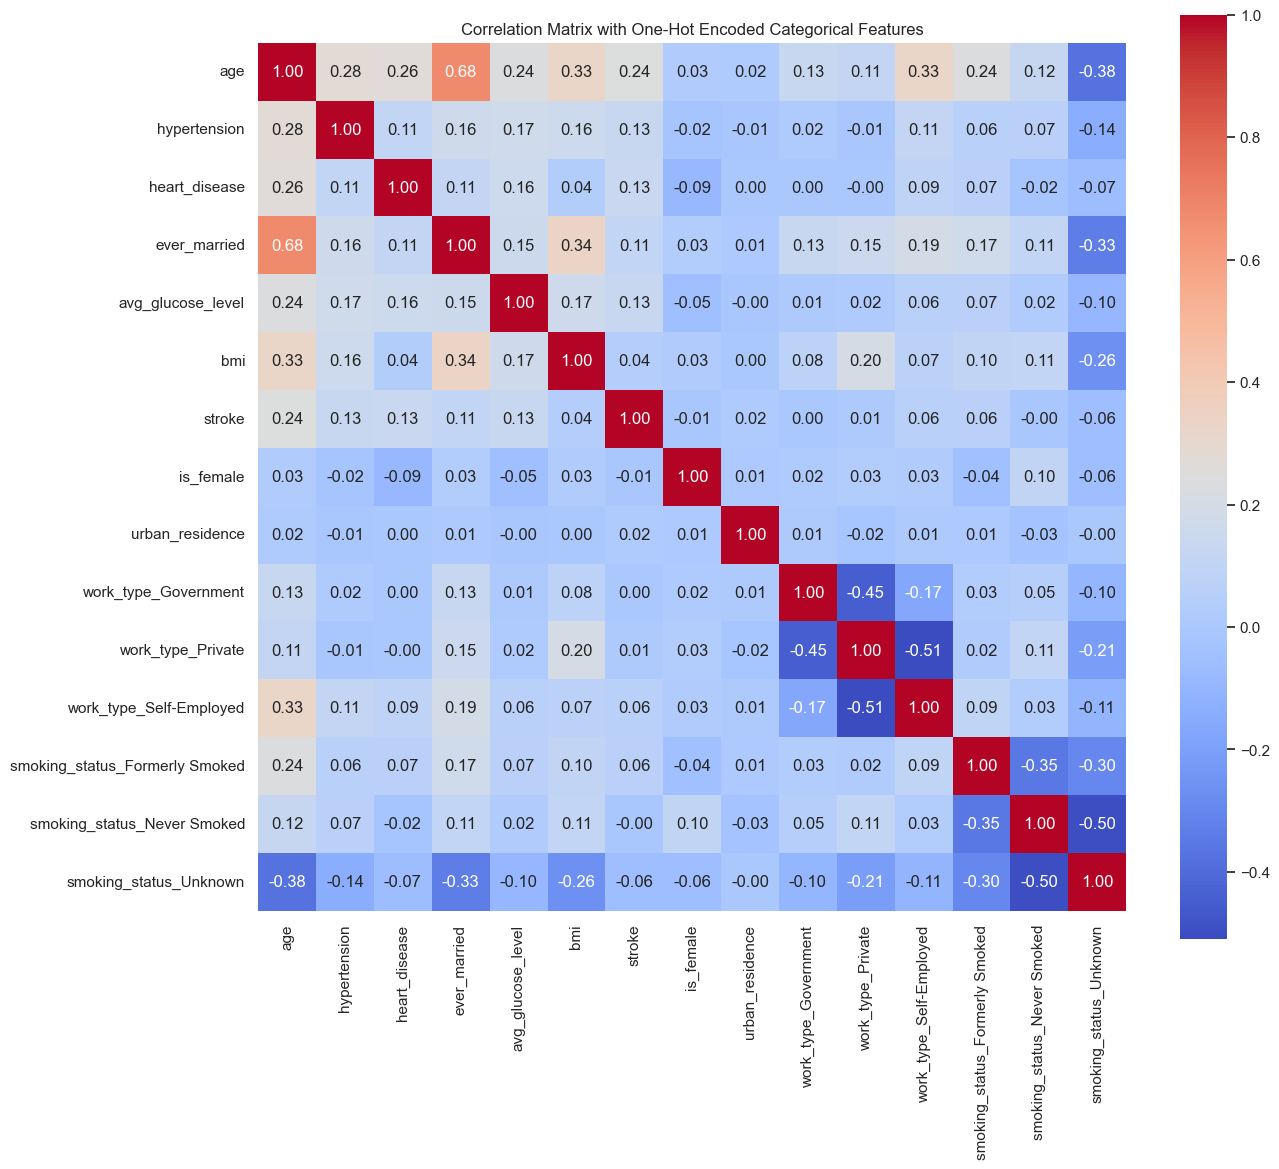

In [115]:
df_encoded = pd.get_dummies(df, columns=['work_type', 'smoking_status'], drop_first=True)
for col in df_encoded.select_dtypes(include='bool'):
    df_encoded[col] = df_encoded[col].astype(int)
z_columns = ['age_z', 'bmi_z', 'avg_glucose_level_z']
df_encoded = df_encoded.drop(columns=z_columns, errors='ignore')
numeric_df = df_encoded.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix with One-Hot Encoded Categorical Features')
plt.show()

Outlined above are two distinct correlation matrices. The first includes all of the columns in the dataset except for the classication features. The second includes the classication features split out by case. With this matrices, a few associations can be seen:

 - ***Ever_Married*** and ***Age*** have a strong positive correlation. This corraborates the association noticed earlier with those being married more likely to have strokes.<br> 
 - ***BMI*** and ***Age*** and ***BMI*** and ***Ever_Married*** have a medium strength positive correlation. This correlation could be BMI interacting with Age and Age interacting with Ever_Married in a collinear sense.<br>
- An incredibly important piece of information to notice is that ***Stroke*** does not have any high correlation with any other feature. The only meaningful correlation is that there exists weak correlation between ***stroke** and the individual featueres ***age***, ***hypertension***, ***heart_disease***, ***ever_married***, and ***avg_glucose_level***.

### Extra EDA Statistical Test - VIF (Variance Inflation Factor)

As an extra statistic exploratory data analysis measurement, the VIF score of each feature is measured. This measurement is useful in identifying collinearity or multicolinearity amongst features. Therefore, this statistic will help the interaction between features be better understood. See [Variance Inflation Factor](https://en.wikipedia.org/wiki/Variance_inflation_factor). A VIF score of 1 means there is no multicolinearity. Values of 1-5 indicate low-moderate colinearity. VIF values > 5 indicate there is multicolinearity that needs to be addressed.

In [76]:
numeric_features = ['age_z','hypertension','heart_disease','ever_married','avg_glucose_level_z','bmi_z','is_female','urban_residence']
X = df[numeric_features].copy()
X[['hypertension','heart_disease','ever_married','is_female','urban_residence']] = X[['hypertension','heart_disease','ever_married','is_female','urban_residence']].astype(int)

X = add_constant(X)
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

               feature       VIF
0                const  7.546778
1                age_z  2.133141
2         hypertension  1.105307
3        heart_disease  1.107839
4         ever_married  1.914381
5  avg_glucose_level_z  1.099362
6                bmi_z  1.171069
7            is_female  1.013910
8      urban_residence  1.000496


From the output, it can be said that the features have low to no multicollinearity that needs to be addressed. Therefore, the data can be used to generate predictions!

### EDA Discussion and Conclusions
The exploratory data analysis run on the stroke prediction cleaned data shows some associations between features and the outcome feature ***stroke***. Fields such as ***Age*** showed positive correlations with whether an individual would have a stroke. However, the data analysis showed that ***stroke*** did not a single highly correlated feature that would determine a records outcome. This is slightly concerning as it could be there are unnoticable interactions amogst features that are unreadible on a correlation matrix. It is important to remember that the baseline accuracy of this dataset is around 95%. This is incredibly high. For the models to be successfully, sensitivity will need to be prioritized and measured as a more important metric. Increasing sensitivity will be the largest challenge working on this dataset. Below, the implementation of models on the cleaned data is outlined. 

---

## **Models** 
For the **Models** section, each model will be evaluated with the code used to generate it shown. A summary of everything done will be presented in the **Results & Analysis** section. The **Models** section contains visualizations related to hyperparameter training, but visualizations describing model performace are also included in the **Results & Analysis** section.

As a recap, this problem is a classification problem: will an individual have a stroke or not. Therefore, it is common knowledge that this is not a problem regression models will have an impact on. Thus, they can be thrown out. 

**Feature engineering** has been done to create binary columns out of ***gender*** and ***residence_type***: ***is_female*** and ***urban_residence*** respectively. Additional feature engineering has created standardardized features for the continuous features ***age***, ***bmi***, and ***avg_glucose_level***: ***age_z***, ***bmi_z***, and ***avg_glucose_level_z*** respectively. With these engineered features, the models will be better equiped to runs models that depended on the geometric distance of values. 

On the topic of **collinearity**, during exploratory data analysis, a VIF statistic method was run on the features to determine how independent each of the features was. Based on the values returned by the method, it was determined that collinearity is not a problem with this dataset.

Based on the above analysis, a few models will be run on this dataset: K-Nearest Neighbors (KNN), Random Forest (RF), and a Nueral Network (NN). 

### KNN - K Nearest Neighbors

For KNN, the standardized continuous columns are necessary since calculations are dealing with distances. The columns below are used before splitting the data unbalanced into a train and test split.

In [8]:
features_knn = ['age_z', 'bmi_z', 'avg_glucose_level_z', 'hypertension', 'heart_disease',
            'ever_married', 'is_female', 'urban_residence']  #uses standardized z-score features and encoded categorical features
X_knn = df[features_knn]
y = df['stroke'].astype(int) #make bool type an int for geometric distance

X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_knn, y, test_size=0.2, random_state=20)

In [9]:
#First Fit
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train_5, y_train_5)

#Evaluate:
y_pred_5 = knn_5.predict(X_test_5)

print(confusion_matrix(y_test_5, y_pred_5))
print(classification_report(y_test_5, y_pred_5))

[[956   5]
 [ 57   0]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       961
           1       0.00      0.00      0.00        57

    accuracy                           0.94      1018
   macro avg       0.47      0.50      0.48      1018
weighted avg       0.89      0.94      0.91      1018



Using K=5 produces an accuracy of 94% and an f1-score of 97%. Under normal circumstances, this would be great. However, the base accuracy is 95%. Additionally, the sensitivity yielded a 0% meaning not a single correct **stroke** outcome was decided. To iterate on this score, the hyperparameter *k* is tested from 1 to 20 to find the highest 5-fold cross validation score. Additionally, the parameter *stratify* is passed to the train_test_split to make sure the distibution of outcome classes is maintained in the train/test split. Otherwise, there could be more *stroke* outcomes one of the sets

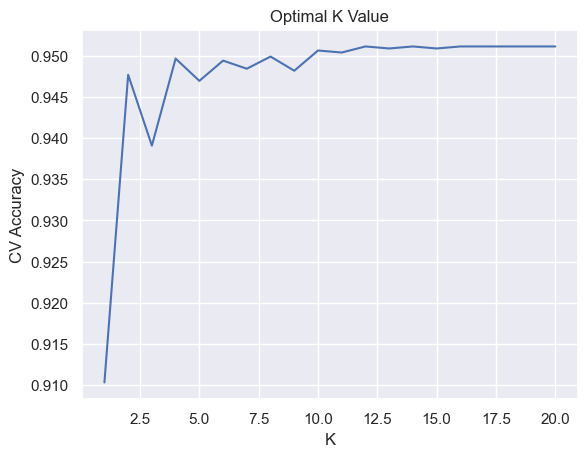

In [12]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y, stratify=y, test_size=0.2, random_state=20)
scores = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, X_train_knn, y_train_knn, cv=5)
    scores.append(cv_scores.mean())
    
plt.plot(range(1, 21), scores)
plt.xlabel("K")
plt.ylabel("CV Accuracy")
plt.title("Optimal K Value")
plt.show()

The hyperparameter tuning shows K=10 is where it should stop requiring more neighbors because of diminishing returns. Therefore, K=10 will be chosen for the final KNN run. 

As stated before, the data is highly imbalanced with a 95% base accuracy if every record was labeled *no stroke*. Therefore, to attempt to create better balance, the library **SMOTE** is used. This stands for **Synthetic Minority Oversampling Technique**. The goal of using it is to have the model tune into the minority outcome, *stroke*, more. 

Below, SMOTE is used to rebalance the data and use K=10 to attempt to maximize the model's predictions. 

In [14]:
smote = SMOTE(random_state=20)
X_resampled, y_resampled = smote.fit_resample(X_train_knn, y_train_knn)

In [15]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_resampled, y_resampled)

y_pred_knn = knn.predict(X_test_knn)

print(confusion_matrix(y_test_knn, y_pred_knn))
print(classification_report(y_test_knn, y_pred_knn, target_names=["No Stroke", "Stroke"]))

[[758 210]
 [ 23  27]]
              precision    recall  f1-score   support

   No Stroke       0.97      0.78      0.87       968
      Stroke       0.11      0.54      0.19        50

    accuracy                           0.77      1018
   macro avg       0.54      0.66      0.53      1018
weighted avg       0.93      0.77      0.83      1018



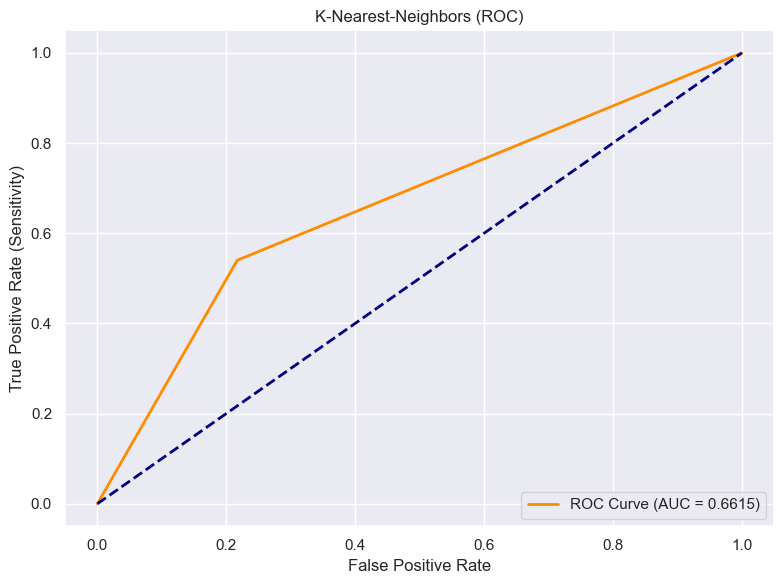

In [35]:
#Compute ROC
fpr_knn, tpr_knn, thresholds = roc_curve(y_test_knn, y_pred_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

#Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_knn:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('K-Nearest-Neighbors (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
sensitivity = recall_score(y_test_knn, y_pred_knn)
print(f"KNN: Sensitivity (Recall for stroke class): {sensitivity:.4f}")

KNN: Sensitivity (Recall for stroke class): 0.5400


The **hyperparameter tuning**, **oversampling**, **cross-validation**, and continuous value **standardization** increased the sensitivity score to 54% which is a lot better than 0%. Some accuracy is sacrificed to attain this, however, with medical data like this, accuracy is not as important. False Positivies are a lot better than False Negatives. 

### Random Forest
The next model to attempt is Random Forest. This model was used due to its usual best performace with accuracy. The outcome associated with a prediction is a lot easier to read aswell. Mainly, it is easily communicated which features the model hones in on. 

To increase readibility with the values, the z-score standardized features are dropped from X for predictions. The Categorical Columns **work_type** and **smoking_status** are also encoded to have a "separate" feature instead of all cases being in one feature. 

Additionally, the data is stratified the same as KNN to ensure equal distributions of the outcome variable between training and testing sets. A 5-Fold cross validation technique is used when training. Due to the successfulness of oversampling the **stroke** outcome, SMOTE is used once again.

The *param_grid* includes different hyperparameters for the random forest. With the use of *GridSearchCV* each combination of these hyperparameters can be tried. The way the best random forest is chosen is through the *scorer* variable. Because *sensitivity* is the metric with the most important, it is passed as the scoring type. 

In [17]:
X_rf = df.drop(columns=['stroke', 'age_z', 'bmi_z', 'avg_glucose_level_z'])
bool_cols = ['hypertension', 'heart_disease', 'ever_married', 'is_female', 'urban_residence']
X_rf[bool_cols] = X_rf[bool_cols].astype(int)

#Endocde Categorical Columns
X_rf = pd.get_dummies(X_rf, columns=['work_type', 'smoking_status'], drop_first=True)

#outcome Feature
y = df['stroke'].astype(int)

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y, stratify=y, test_size=0.2, random_state=20)

# Balance with SMOTE since data is heavily favored towards no stroke
sm = SMOTE(random_state=20)
X_train_res_rf, y_train_res_rf = sm.fit_resample(X_train_rf, y_train_rf)

In [18]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=20)
scorer = make_scorer(recall_score)  # sensitivity is most important

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring=scorer, cv=5, n_jobs=-1, verbose=1)

grid_search.fit(X_train_res_rf, y_train_res_rf)



Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=20), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring=make_scorer(recall_score, response_method='predict'),
             verbose=1)

In [19]:
best_rf = grid_search.best_estimator_

y_pred_rf = best_rf.predict(X_test_rf)

print("Best params:", grid_search.best_params_)
print(classification_report(y_test_rf, y_pred_rf, target_names=["No Stroke", "Stroke"]))

Best params: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

   No Stroke       0.96      0.98      0.97       968
      Stroke       0.27      0.18      0.22        50

    accuracy                           0.94      1018
   macro avg       0.62      0.58      0.59      1018
weighted avg       0.92      0.94      0.93      1018



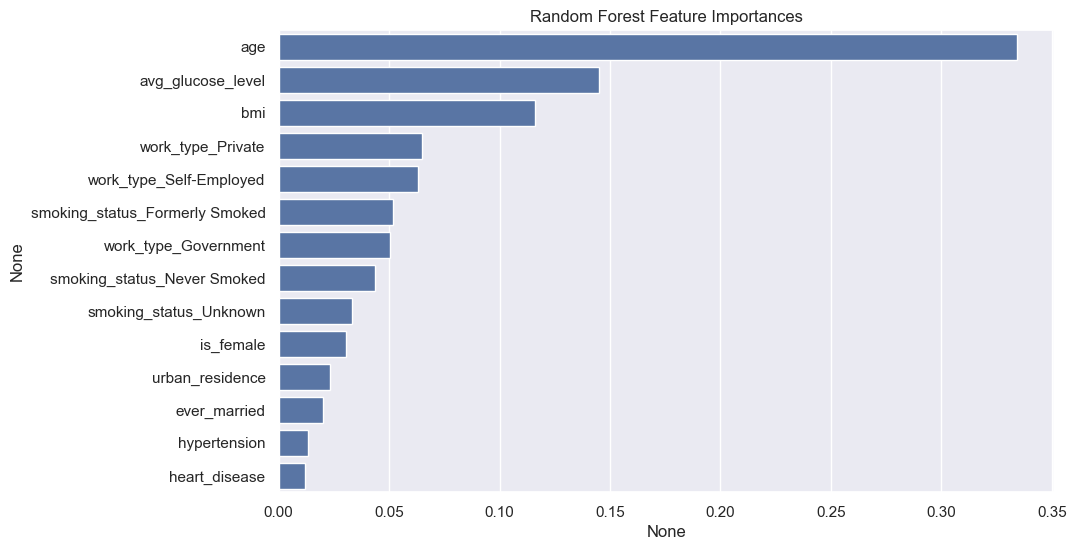

In [46]:
feat_importances = pd.Series(best_rf.feature_importances_, index=X_rf.columns)
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importances.sort_values(ascending=False), y=feat_importances.sort_values(ascending=False).index)
plt.title('Random Forest Feature Importances')
plt.show()

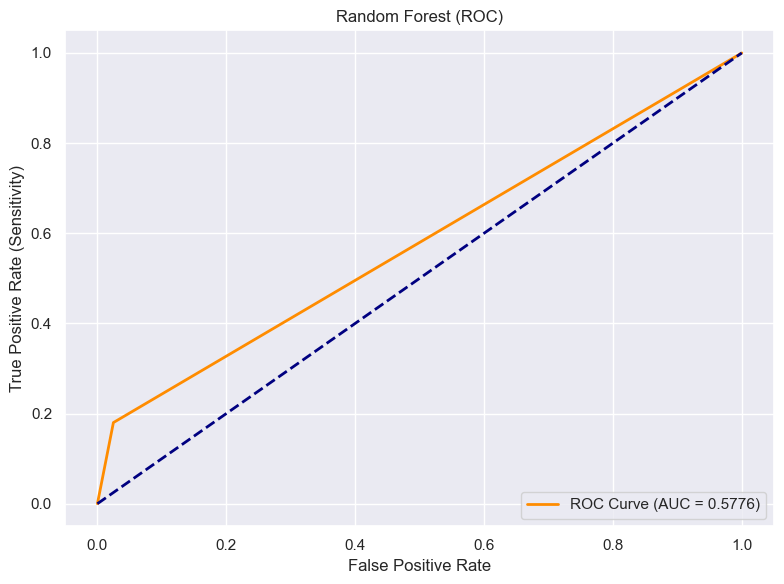

In [37]:
#ROC Calculation
fpr_rf, tpr_rf, thresholds = roc_curve(y_test_rf, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

#Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Random Forest (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:
sensitivity = recall_score(y_test_rf, y_pred_rf)
print(f"Random Forest: Sensitivity (Recall for stroke class): {sensitivity:.4f}")

Random Forest: Sensitivity (Recall for stroke class): 0.1800


After using many techniques to try and improve sensitivity, Random Forest maxed out at 18%. This is not great. Based on feature importance, the forest focused heavily on **age**, **avg_glucose_level**, and **bmi**. These are the three continuous variables, and during exploratory data analysis, there seemed to be some pattern between the outcomes, but Random Forest was unable to correctly identify the minority case *stroke*.

### Neural Network
The final model used on the stroke dataset is one not used during class. Neural Networks work through interconnected nodes nad the use of weights on these connections. This implementation took a little bit, but it was an area that seemed interesting to work on.

Help for this implemetation from:<br>
[Neural Network with Keras](https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/)<br> 
[Guide to Sequential](https://faroit.com/keras-docs/1.0.1/getting-started/sequential-model-guide/)<br>
[Early Stopping](https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/)<br>

Neural Networks are recommended to work with normalized data. Therefore, the non-standarized features are dropped from this models used features.<br> 
After creating the training and test splits, the weights for the nueral network are initialized.<br>
The *model* is created with a first hidden layer of 64 nodes with a dropout of 30% to make sure the model is not overfitting. The second layer has 32 nodes and follows the same anti-overfitting strategy. The output layer is 1 node which outputs the probability of whether the record has a stroke or not. <br>
The history of the model is kept as iterations of *epochs* continue. With the help of Early Stopping, the model will stop training if the loss function determines improvements are not being made.<br>
Finally, a prediction is made and metrics are reported. 

In [23]:
#Get Features -- since the scalable feautures are already engineered they are dropped
X_NN = df.drop(columns=['stroke', 'age', 'bmi', 'avg_glucose_level'])
X_NN[bool_cols] = X_NN[bool_cols].astype(int)
X_NN = pd.get_dummies(X_NN, columns=['work_type', 'smoking_status'], drop_first=True)
y = df['stroke'].astype(int)

#Split with stratification for balance
X_train_NN, X_test_NN, y_train_NN, y_test_NN = train_test_split(X_NN, y, stratify=y, test_size=0.2, random_state=20)

#Weights for NN 
class_weights = compute_class_weight(class_weight='balanced', classes=np.array([0, 1]), y=y_train_NN)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

In [24]:
#Create the NN model
model = Sequential([
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid') #bnary classification
])
#CrossEntropy allows for double checking
model.compile(optimizer='adam',
              loss='binary_crossentropy',#evealuates performace for binary classification problems
              metrics=['Recall', 'Precision', 'AUC'])
#Early stopping keeps us from running through every epoch
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
#Create the history by iterating throguh epochs. 
history = model.fit(X_train_NN, y_train_NN,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=32,
                    class_weight=class_weight_dict,
                    callbacks=[early_stop],
                    verbose=0) #Turn off verbose to not clutter jupyter notbooks

In [25]:
#Predict with the output model a
y_pred_probs_NN = model.predict(X_test_NN).flatten()
y_pred_NN = (y_pred_probs_NN > 0.5).astype(int)

print(classification_report(y_test_NN, y_pred_NN, digits=4))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
              precision    recall  f1-score   support

           0     0.9873    0.7252    0.8362       968
           1     0.1336    0.8200    0.2297        50

    accuracy                         0.7299      1018
   macro avg     0.5604    0.7726    0.5330      1018
weighted avg     0.9454    0.7299    0.8064      1018



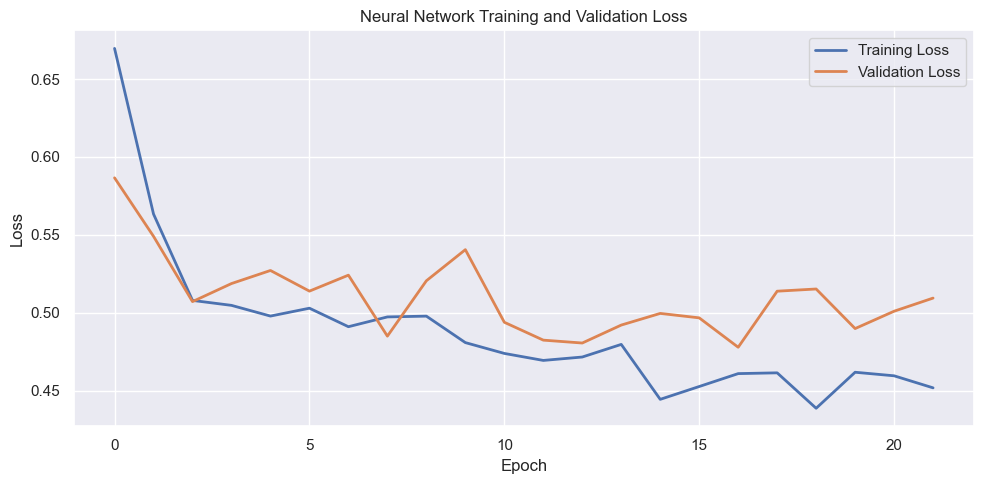

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Neural Network Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
y_pred_probs_NN = model.predict(X_test_NN).flatten()
y_pred_NN = (y_pred_probs_NN > 0.5).astype(int)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [33]:
sensitivity = recall_score(y_test_NN, y_pred_NN)
print(f"Sensitivity (Recall for stroke class): {sensitivity:.4f}")

Sensitivity (Recall for stroke class): 0.8200


The Neural Network implementation resulted in the best sensitivity: 82%. Communicated in the epoch graph, the loss between the training and validation sets decreased as epochs before early stopping. Now that the final model has been developed for this project, the results can be compared and analyzed. 

---

## **Results & Analysis** 

As stated throughout this notebook, raw accuracy is unimportant to this dataset because the baseline accuracy is 95%. To analyze this, the Confusion matrix for the initial K=5 KNN Model is shown. This confusion matrix communicates a 93% accuracy- worse than baseline. However, 93% would usually seem like a good accuracy. The other item to consider is that this is medical data. Improving accuracy is nice, but improving the accuracy of detecting strokes in those who are likely to have strokes is paramount. Therefore, sensitivity/recall is more important. True Positivies are prioritized above all else. The confusion matrix below has a sensitivity of 0%. Interpreted, that means 0% of those who would have strokes were correctly classified. This is bad. 

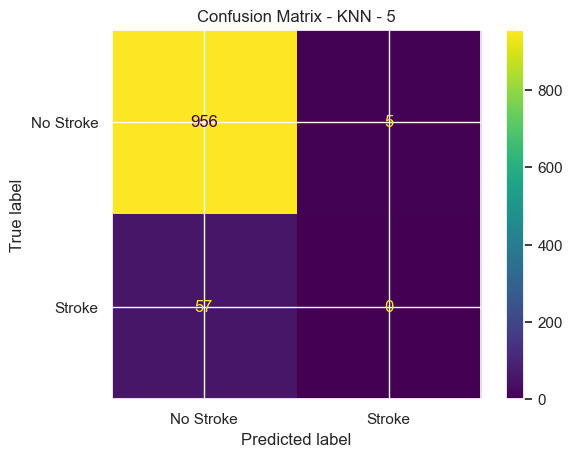

In [40]:
disp = ConfusionMatrixDisplay.from_estimator(knn_5, X_test_5, y_test_5, display_labels=["No Stroke", "Stroke"])
disp.ax_.set_title("Confusion Matrix - KNN - 5")
plt.show()

With the rationale of sensitivity/recall communicated, the confusion matrices for the KNN model with optimal hyperparameters, the Random Forest model with optimal hyperparameters, and the Neural Network are displayed along with their sensitivity scores. 

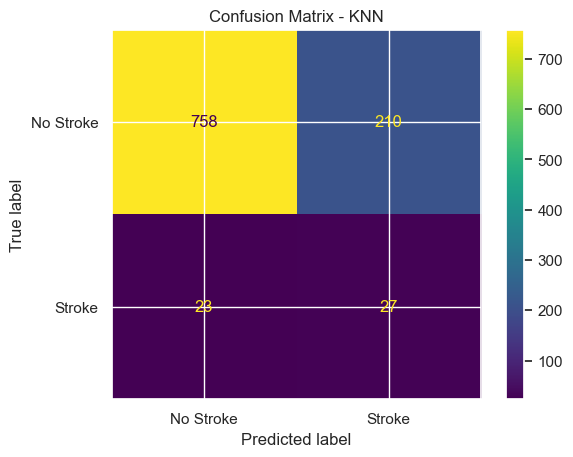

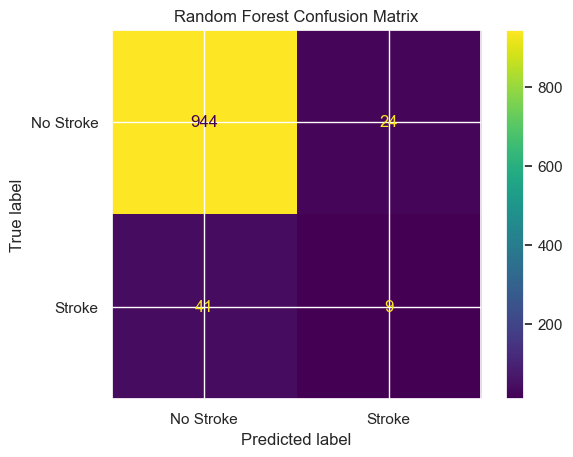

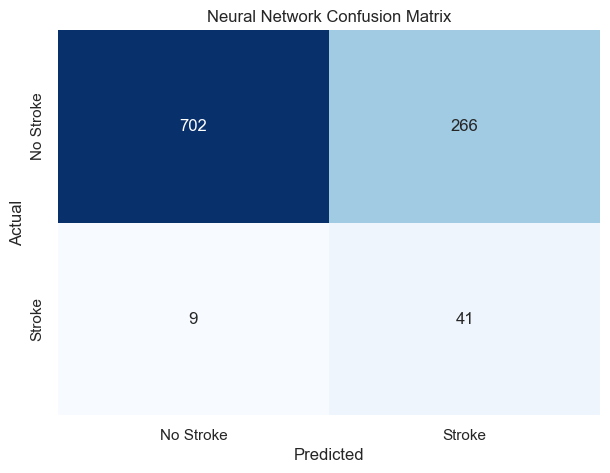

KNN: Sensitivity (Recall for stroke class): 0.5400
Random Forest: Sensitivity (Recall for stroke class): 0.1800
Sensitivity (Recall for stroke class): 0.8200


In [44]:
#KNN 
disp = ConfusionMatrixDisplay.from_estimator(knn, X_test_knn, y_test_knn, display_labels=["No Stroke", "Stroke"])
disp.ax_.set_title("Confusion Matrix - KNN")
plt.show()

#RF
ConfusionMatrixDisplay.from_estimator(best_rf, X_test_rf, y_test_rf, display_labels=["No Stroke", "Stroke"])
plt.title("Random Forest Confusion Matrix")
plt.show()

#NN
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix(y_test_NN, y_pred_NN), annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Neural Network Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#KNN Sensitivity
sensitivity = recall_score(y_test_knn, y_pred_knn)
print(f"KNN: Sensitivity (Recall for stroke class): {sensitivity:.4f}")

#RF Sensitivity
sensitivity = recall_score(y_test_rf, y_pred_rf)
print(f"Random Forest: Sensitivity (Recall for stroke class): {sensitivity:.4f}")

#NN Sensitivity 
sensitivity = recall_score(y_test_NN, y_pred_NN)
print(f"Sensitivity (Recall for stroke class): {sensitivity:.4f}")

It takes little interpretation to see the story these confusion matrix tell.<br>
#### K-Nearest-Neighbors (KNN)
After adjusting the hyperparameters and oversampling the minority outcome, the KNN model increased from 0% to 54% in its sensitivity. This was with selecting the engineered features for normalized continuous data. For this model, the non-normalized features were droppped from the prediction features. This sensitivity score is a great improvement. However, 50% of those who had strokes were misclassified. This is not great for those individuals.<br>

Analyzing the ROC graph shows a similar story. An AUC score of anything less than 0.7 is no better than randomly choosing an outcome. The KNN model results in an AUC score of 0.66. This communicates that the model fails to give an indication that it could make accurate predictions. 

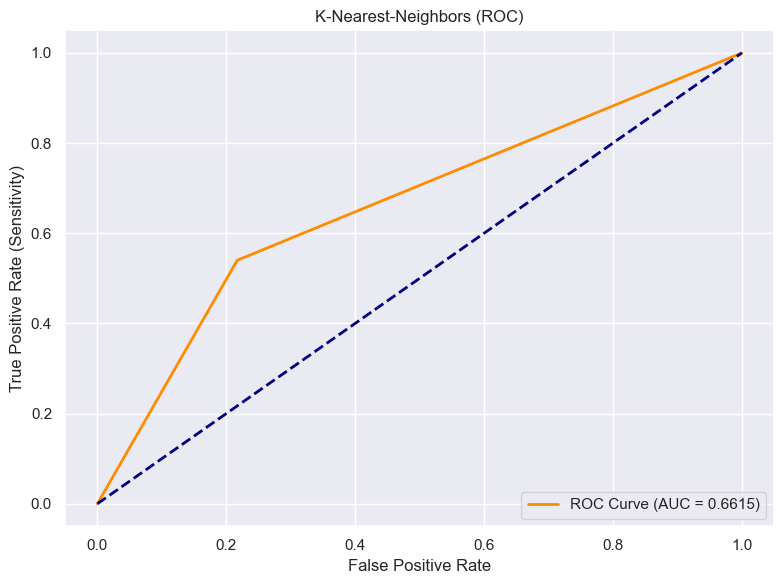

In [49]:
#Compute ROC
fpr_knn, tpr_knn, thresholds = roc_curve(y_test_knn, y_pred_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

#Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_knn:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('K-Nearest-Neighbors (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Random Forest (RF)
Random forest iterated through many different hyperparameters combinations with the same oversampling strategy. Because Random Forest is less reliant on standardized data, the Z-Score standardized features were removed from the training feautes used in the model. Even with all of this consideration, it was not enough to raise the sensitivity score. This is despite sacrificing a little accuracy down from baseline of 95% to 93.8%, too! 

Focusing on Random Forest, the features of importance to the model are easily communicated.

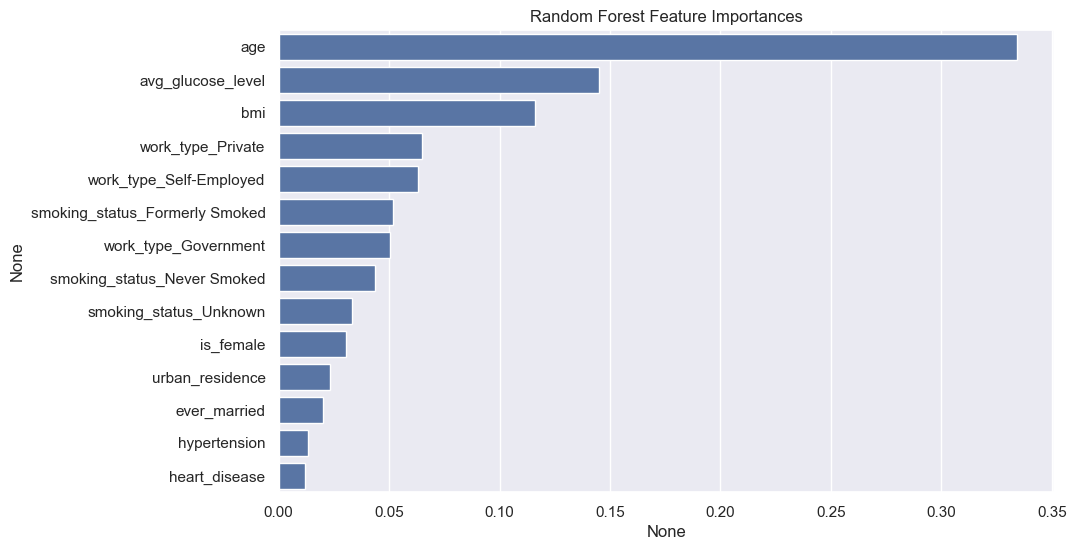

In [45]:
feat_importances = pd.Series(best_rf.feature_importances_, index=X_rf.columns)
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importances.sort_values(ascending=False), y=feat_importances.sort_values(ascending=False).index)
plt.title('Random Forest Feature Importances')
plt.show()

The Random Forest model tended to focus on the three continuous features **age**, **avg_glucose_level**, and **bmi** were most important. This seems plausible as the exploratory data analysis at the beginning of the notebook showed distributions for no stroke/stroke outcomes overlaid by the values of these features. Some patterns were discernable. Despite this, Random Forest performed incredibly poorly. Below, the ROC curve is show. What the graph communicates is the random forest model developed is almost no better than a random guess. Why did this happen to the random forest model? Based on a little research during the iteration step of building the model, sometimes random forest models cannot get better with imbalanced data. Despite oversampling the minority outcome with SMOTE, it seems the data was too imbalanced for the random forest model. 

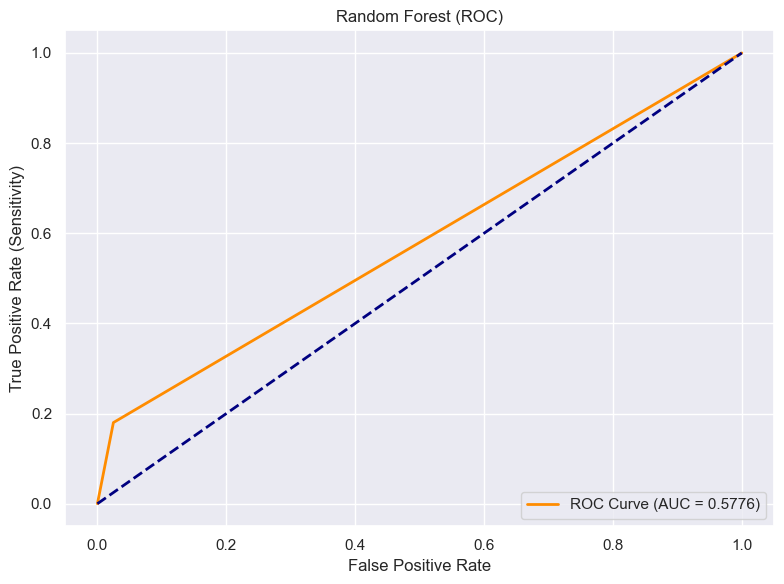

In [47]:
#ROC Calculation
fpr_rf, tpr_rf, thresholds = roc_curve(y_test_rf, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

#Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Random Forest (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Neural Network
The neural network model performed much better than the KNN and RF models. Scoring an 92% sensitivity. Features selected for this model included the standardized continuous features. The original value features were dropped for this model. If the accuracy is measured from the confusion matrix, the score seems bad: 72.9%. From the confusion matrix, it seems False Positivies increased a lot in this model. Why does accuracy not matter as much with this model? What does that mean, and how can this be communicated? If a doctor is running a model on whether an individual will have a stroke or not, they would rather be safe than sorry. Therefore, False Positives are not necessarily bad as an individual could show statistics similar to those who have had strokes but get lucky and not have one. The patient and doctor would rather know the information than be misclassified as not being at risk of a stroke. <br>

The ROC Curve of the neural network model is shown below. This AUC score is much better than that of Random Forest. A good AUC score is 0.8 or higher. What the neural network model shows is an AUC score of 0.83. This score translates to this model having good potential of predicting outcomes. This is great given the RF and KNN models was no better than a random guess. 

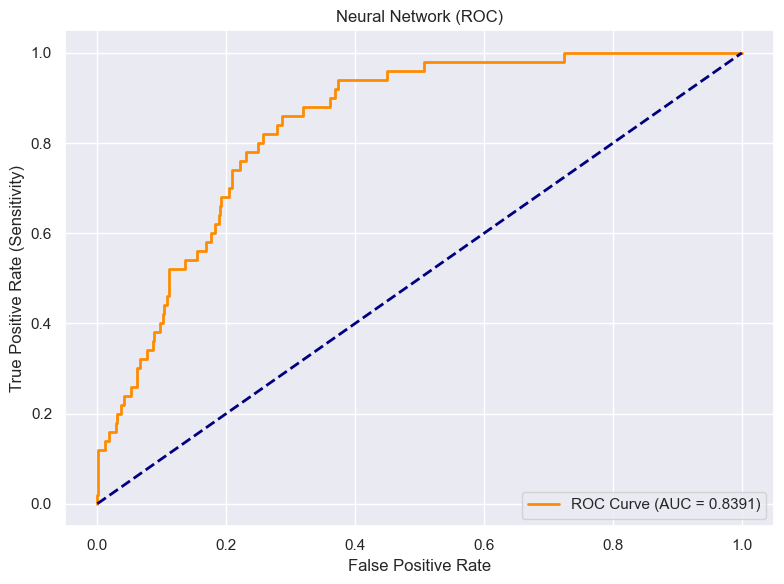

In [48]:
#Compute ROC
fpr_nn, tpr_nn, thresholds = roc_curve(y_test_NN, y_pred_probs_NN)
roc_auc_nn = auc(fpr_nn, tpr_nn)

#Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_nn, tpr_nn, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_nn:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Neural Network (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

### Analysis Conclusion
What the results of all three models show is Neural Network prioritized sensitivity at the cost of accuracy. However, this resulted in a much better performing model that could be used to make predictions for strokes. KNN was slightly better than RF, but neither can be used to make predictions. Each model has high accuracies at the cost of sensitivity/recall. As stated throughout this notebook, this entire project is really about sensitivity improvement instead of accuracy improvement.

---

## **Discussion and Conclusion** 

This project was an incredible learning experience for the data science process. It was incredibly helpful to take time to look for a problem I wanted to solve and then attempt to create a model that could accurately predict the outcome. The original question posed at the beginning of this project was, "can machine learning models and techniques be used by doctors to predict strokes?" Based on my best model's results, the answer is no. Although, the neural network's sensitivity was increased to 82%, that is not high enough to be an amazing model. That line would be drawn with anything above 90%. This model could help double check a doctor, but it could not be relied on fully.

### Learning and Takeaways
During this project, I was able to learn how to use a lot of different models with tensorflow and scikit learn. I implemented KNN, Random Forest, and Neural Networks using built in models. This is different from in class work where we built out the models we used for the most part.<br>
A takeaway I have from this project is the data science process. I chose a dataset, cleaned it, explored the data, chose models that would be appropriate, iterated on those models, and recorded the results. Individually working on a pipeline like this is a great learning experience as it more closely follows what a day-to-day operation would look like compared to a typical lab in class.  

### Shortcomings
Although a lot was learned from this project, a lot went wrong, too. During class, it was stated that random forest is usually one of the best models for datasets. However, I could not get the model to produce a high sensitivity regardless of data oversampling, stratification of train/test sets, and hyperparameter tuning. This was dissapointing, but while looking for a solution online, it seemed that sometimes random forest does not do well with highly imbalanced data like mine no matter what.<br>

Another piece that did not go well is that a model could not be trained that correctly predicted those with strokes with high accuracy. The neural network model had good accuracy, but not high enough to say it could accurately predict strokes.<br>

The readibility of features was tough, too. With random forest, it was easy enough to tell which features were highly importantant even though the model did not perform great. For KNN and neural network, it was tougher for me to find readible features. This is because I was using standardized continuous features, but the models themselves do not aid readibility either. 

### Improvement Areas
There are a few ways this project could be improved or extended. Firstly, more models could be run on the data. I chose three different ones that I felt covered a lot of bases, but models like SVM may produce good outcomes. Secondly, more data is needed with possibly more features. Many of the features showed little correlation with the outcome variable ***stroke***, I wonder if experts or those with field knowledge could think of other features to add to the dataset. The data is incredibly imbalanced, too. I tried oversampling, but I am sure there is a better way that it could be done. Finally, I'm sure my code could be improved. This was my first time trying to use Python for a larger project such as this-- I've used R in the past. I had to research a lot of different libraries to use, and I'm sure there's some overlap between the libraries I used. 

### Thank you
I sincerely appreciate the reader for making it to the end of my project. I hope it was interesting. Medical classification problems are my favorite to deal with because of the real-world applications!